# Imports

In [112]:
import cv2
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython import display
import shutil

# Paths

In [110]:
face_cascade = cv2.CascadeClassifier('C:\\Users\\MYYM\Anaconda3\\envs\\cv2\Lib\\site-packages\\cv2\\data\\haarcascade_frontalface_default.xml') 
eye_cascade = cv2.CascadeClassifier('C:\\Users\\MYYM\Anaconda3\\envs\\cv2\Lib\\site-packages\\cv2\\data\\haarcascade_eye.xml') 
smile_cascade = cv2.CascadeClassifier('C:\\Users\\MYYM\Anaconda3\\envs\\cv2\Lib\\site-packages\\cv2\\data\\haarcascade_smile.xml') 

# Utility Functions

In [132]:
def detect(gray, frame): 
    faces = face_cascade.detectMultiScale(gray, 1.3, 5) 
    for (x, y, w, h) in faces: 
        cv2.rectangle(frame, (x, y), ((x + w), (y + h)), (255, 0, 0), 2) 
        roi_gray = gray[y:y + h, x:x + w] 
        roi_color = frame[y:y + h, x:x + w] 
        smiles = smile_cascade.detectMultiScale(roi_gray, 1.8, 40,minSize=(25, 25)) 
        for (sx, sy, sw, sh) in smiles: 
            cv2.rectangle(roi_color, (sx, sy), ((sx + sw), (sy + sh)), (0, 0, 255), 2) 
    return frame 

# Smile Detection

In [133]:
input_video_path = 'D:\\Seedcode\\Q\\dataset\\2.mp4'
output_path = 'detected'
if os.path.exists(output_path):
    shutil.rmtree(output_path)
os.mkdir(output_path)
video_capture = cv2.VideoCapture(input_video_path)
count = 0
while video_capture.isOpened(): 
    _, frame = video_capture.read()
    try:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) 
    except:
        break
    gray = cv2.rotate(gray, cv2.ROTATE_90_CLOCKWISE)
    frame = cv2.rotate(frame, cv2.ROTATE_90_CLOCKWISE)
    canvas = detect(gray, frame)  
    count +=1
    cv2.imwrite("{}/frame{}.jpg".format(output_path,count),canvas)
video_capture.release()                                  

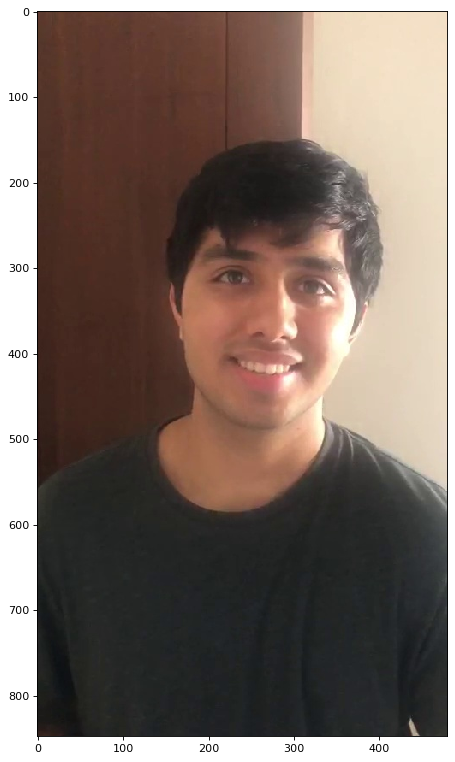

In [135]:
PATH = output_path
path, dirs, files = next(os.walk(PATH))
file_count = len(files)

figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')
for i in range(1,file_count+1):
    p = "{}/frame{}.jpg".format(PATH,(i))
    image = mpimg.imread(p) # images are color images
    plt.gca().clear()
    plt.imshow(image);
    display.display(plt.gcf())
    display.clear_output(wait=True)